<a id="TOP"></a>
<div class="alert alert-block alert-info">
</div>

___

# Acquire and Summarize

### 1. Acquire data from the cloud database.

- You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

- **Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for** `airconditioningtypeid`. 
- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) 
- Only include properties that have a latitude and longitude value.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from env import gdb

In [4]:
# Tables is zillow

tables_in_zillow = ['airconditioningtype',
'architecturalstyletype',
'buildingclasstype',
'heatingorsystemtype',
'predictions_2016',
'predictions_2017',
'properties_2016',
'properties_2017',
'propertylandusetype',
'storytype',
'typeconstructiontype',
'unique_properties']

In [6]:
for i in tables_in_zillow:
    print(f'''
    SELECT * FROM {i}
    LIMIT 10;/*
    
*/
    ''')


    SELECT * FROM airconditioningtype
    LIMIT 10;/*
    
*/
    

    SELECT * FROM architecturalstyletype
    LIMIT 10;/*
    
*/
    

    SELECT * FROM buildingclasstype
    LIMIT 10;/*
    
*/
    

    SELECT * FROM heatingorsystemtype
    LIMIT 10;/*
    
*/
    

    SELECT * FROM predictions_2016
    LIMIT 10;/*
    
*/
    

    SELECT * FROM predictions_2017
    LIMIT 10;/*
    
*/
    

    SELECT * FROM properties_2016
    LIMIT 10;/*
    
*/
    

    SELECT * FROM properties_2017
    LIMIT 10;/*
    
*/
    

    SELECT * FROM propertylandusetype
    LIMIT 10;/*
    
*/
    

    SELECT * FROM storytype
    LIMIT 10;/*
    
*/
    

    SELECT * FROM typeconstructiontype
    LIMIT 10;/*
    
*/
    

    SELECT * FROM unique_properties
    LIMIT 10;/*
    
*/
    



### Columns: HIDDEN 
<!---
id bigint
parcelid bigint
airconditioningtypeid double
architecturalstyletypeid double
basementsqft double
bathroomcnt double
bedroomcnt double
buildingclasstypeid double
buildingqualitytypeid double
calculatedbathnbr double
decktypeid double
finishedfloor1squarefeet double
calculatedfinishedsquarefeet double
finishedsquarefeet12 double
finishedsquarefeet13 double
finishedsquarefeet15 double
finishedsquarefeet50 double
finishedsquarefeet6 double
fips double
fireplacecnt double
fullbathcnt double
garagecarcnt double
garagetotalsqft double
hashottuborspa tinyint(1)
heatingorsystemtypeid double
latitude double
longitude double
lotsizesquarefeet double
poolcnt double
poolsizesum double
pooltypeid10 double
pooltypeid2 double
pooltypeid7 double
propertycountylandusecode text
propertylandusetypeid double
propertyzoningdesc text
rawcensustractandblock double
regionidcity double
regionidcounty double
regionidneighborhood double
regionidzip double
roomcnt double
storytypeid double
threequarterbathnbr double
typeconstructiontypeid double
unitcnt double
yardbuildingsqft17 double
yardbuildingsqft26 double
yearbuilt double
numberofstories double
fireplaceflag tinyint(1) 
structuretaxvaluedollarcnt double
taxvaluedollarcnt double
assessmentyear double
landtaxvaluedollarcnt double
taxamount double
taxdelinquencyflag text
taxdelinquencyyear double
censustractandblock double


|Columns | type |
|---:|:---|
|id| bigint|
|parcelid| bigint|
|airconditioningtypeid| double|
|architecturalstyletypeid| double|
|basementsqft| double|
|bathroomcnt| double|
|bedroomcnt |double|
|buildingclasstypeid| double|
|buildingqualitytypeid| double|
|calculatedbathnbr| double|
|decktypeid| double|
|finishedfloor1squarefeet |double|
|calculatedfinishedsquarefeet| double|
|finishedsquarefeet12| double|
finishedsquarefeet13 double
finishedsquarefeet15 double
finishedsquarefeet50 double
finishedsquarefeet6 double
fips double
fireplacecnt double
fullbathcnt double
garagecarcnt double
garagetotalsqft double
hashottuborspa tinyint(1)
heatingorsystemtypeid double
latitude double
longitude double
lotsizesquarefeet double
poolcnt double
poolsizesum double
pooltypeid10 double
pooltypeid2 double
pooltypeid7 double
propertycountylandusecode text
propertylandusetypeid double
propertyzoningdesc text
rawcensustractandblock double
regionidcity double
regionidcounty double
regionidneighborhood double
regionidzip double
roomcnt double
storytypeid double
threequarterbathnbr double
typeconstructiontypeid double
unitcnt double
yardbuildingsqft17 double
yardbuildingsqft26 double
yearbuilt double
numberofstories double
fireplaceflag tinyint(1) 
structuretaxvaluedollarcnt double
taxvaluedollarcnt double
assessmentyear double
landtaxvaluedollarcnt double
taxamount double
taxdelinquencyflag text
taxdelinquencyyear double
censustractandblock double

--->

In [7]:

property_columns = ['id',
'parcelid',
'airconditioningtypeid',
'architecturalstyletypeid',
'basementsqft',
'bathroomcnt',
'bedroomcnt',
'buildingclasstypeid',
'buildingqualitytypeid',
'calculatedbathnbr',
'decktypeid',
'finishedfloor1squarefeet',
'calculatedfinishedsquarefeet',
'finishedsquarefeet12',
'finishedsquarefeet13',
'finishedsquarefeet15',
'finishedsquarefeet50',
'finishedsquarefeet6',
'fips',
'fireplacecnt',
'fullbathcnt',
'garagecarcnt',
'garagetotalsqft',
'hashottuborspa',
'heatingorsystemtypeid',
'latitude',
'longitude',
'lotsizesquarefeet',
'poolcnt',
'poolsizesum',
'pooltypeid10',
'pooltypeid2',
'pooltypeid7',
'propertycountylandusecode',
'propertylandusetypeid',
'propertyzoningdesc',
'rawcensustractandblock',
'regionidcity',
'regionidcounty',
'regionidneighborhood',
'regionidzip',
'roomcnt',
'storytypeid',
'threequarterbathnbr',
'typeconstructiontypeid',
'unitcnt',
'yardbuildingsqft17',
'yardbuildingsqft26',
'yearbuilt',
'numberofstories',
'fireplaceflag',
'structuretaxvaluedollarcnt',
'taxvaluedollarcnt',
'assessmentyear',
'landtaxvaluedollarcnt',
'taxamount',
'taxdelinquencyflag',
'taxdelinquencyyear',
'censustractandblock']


In [56]:
join_tables = ['airconditioningtype',
'architecturalstyletype',
'buildingclasstype',
'heatingorsystemtype',
'propertylandusetype',
'storytype',
'typeconstructiontype',]

In [64]:
'architype'.removesuffix('type')

'archi'

In [65]:
for col in join_tables:
    col
    print(f'''
    IN:
    {col} :
    {col}id
    {col.removesuffix('type')}desc
    ''')


    IN:
    airconditioningtype :
    airconditioningtypeid
    airconditioningdesc
    

    IN:
    architecturalstyletype :
    architecturalstyletypeid
    architecturalstyledesc
    

    IN:
    buildingclasstype :
    buildingclasstypeid
    buildingclassdesc
    

    IN:
    heatingorsystemtype :
    heatingorsystemtypeid
    heatingorsystemdesc
    

    IN:
    propertylandusetype :
    propertylandusetypeid
    propertylandusedesc
    

    IN:
    storytype :
    storytypeid
    storydesc
    

    IN:
    typeconstructiontype :
    typeconstructiontypeid
    typeconstructiondesc
    


In [73]:
for col in join_tables:
    col
    print(f'''\
LEFT JOIN {col} {col[:3]}
ON p.{col}id = {col[:3]}.{col}id
''')

LEFT JOIN airconditioningtype air
ON p.airconditioningtypeid = air.airconditioningtypeid

LEFT JOIN architecturalstyletype arc
ON p.architecturalstyletypeid = arc.architecturalstyletypeid

LEFT JOIN buildingclasstype bui
ON p.buildingclasstypeid = bui.buildingclasstypeid

LEFT JOIN heatingorsystemtype hea
ON p.heatingorsystemtypeid = hea.heatingorsystemtypeid

LEFT JOIN propertylandusetype pro
ON p.propertylandusetypeid = pro.propertylandusetypeid

LEFT JOIN storytype sto
ON p.storytypeid = sto.storytypeid

LEFT JOIN typeconstructiontype typ
ON p.typeconstructiontypeid = typ.typeconstructiontypeid



In [83]:
for col in join_tables:
    col
    print(f'''\
{col[:3]}.{col.removesuffix('type')}desc {col[:3]}_{col[-4:]},\
''')

air.airconditioningdesc air_type,
arc.architecturalstyledesc arc_type,
bui.buildingclassdesc bui_type,
hea.heatingorsystemdesc hea_type,
pro.propertylandusedesc pro_type,
sto.storydesc sto_type,
typ.typeconstructiondesc typ_type,


In [19]:
[property_columns[0],property_columns[2]]

['id', 'airconditioningtypeid']

In [20]:
predictions_2017 = gdb('zillow', '''
SELECT * FROM predictions_2017
    WHERE transactiondate >= "2017-01-01" 
		AND transactiondate < "2018-01-01";''')

In [24]:
predictions_2017.columns.to_list()

['id', 'parcelid', 'logerror', 'transactiondate']

In [23]:
predictions_2017.id.value_counts().max()

1

In [25]:
predictions_2017.parcelid.value_counts().max()

3

In [26]:
predictions_2017.parcelid.value_counts()

11991059    3
10857130    3
12612211    3
10984661    2
10946379    2
           ..
11446758    1
14013599    1
13853971    1
17128107    1
12826780    1
Name: parcelid, Length: 77414, dtype: int64

In [35]:
predictions_2017.parcelid.value_counts()[predictions_2017.parcelid.value_counts() > 1]

11991059    3
10857130    3
12612211    3
10984661    2
10946379    2
           ..
14254548    2
12541155    2
11917650    2
10871677    2
17280166    2
Name: parcelid, Length: 196, dtype: int64

In [55]:
predictions_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               77613 non-null  int64  
 1   parcelid         77613 non-null  int64  
 2   logerror         77613 non-null  float64
 3   transactiondate  77613 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.4+ MB


In [36]:
multi_sale_index = predictions_2017.parcelid.value_counts()[predictions_2017.parcelid.value_counts() > 1]

In [46]:
multi_sale_index = multi_sale_index.index.to_list()

In [44]:
predictions_2017[predictions_2017.parcelid.duplicated() == True]

,id,parcelid,logerror,transactiondate
117,117,11393337,0.086137,2017-06-08
625,625,14634203,-0.061973,2017-08-04
1018,1018,11721753,0.017785,2017-07-21
1248,1248,11289917,-0.362001,2017-06-23
1734,1734,11637029,-0.093399,2017-07-28
...,...,...,...,...
60010,60010,13066981,-0.043423,2017-09-01
62239,62239,10852812,2.237069,2017-08-31
63132,63132,12136147,-0.078758,2017-08-31
64278,64278,17282392,0.901074,2017-08-25


In [49]:
predictions_2017.head(20)

,id,parcelid,logerror,transactiondate
0,0,14297519,0.025595,2017-01-01
1,1,17052889,0.055619,2017-01-01
2,2,14186244,0.005383,2017-01-01
3,3,12177905,-0.103410,2017-01-01
4,4,10887214,0.006940,2017-01-01
5,5,17143294,-0.020526,2017-01-01
6,6,12095076,-0.001011,2017-01-01
7,7,12069064,0.101723,2017-01-01
8,8,12790562,-0.040966,2017-01-02
9,9,11542646,-0.036763,2017-01-02


In [50]:
predictions_2017.duplicated(subset=['parcelid'], keep='last')

0        False
1        False
2        False
3        False
4        False
         ...  
77608    False
77609    False
77610    False
77611    False
77612    False
Length: 77613, dtype: bool

In [51]:
predictions_2017[predictions_2017.duplicated(subset=['parcelid'], keep='last') == True]

,id,parcelid,logerror,transactiondate
116,116,11393337,0.015172,2017-01-03
624,624,14634203,-0.019491,2017-01-04
1017,1017,11721753,-0.011052,2017-01-05
1247,1247,11289917,0.227903,2017-01-06
1733,1733,11637029,-0.024199,2017-01-09
...,...,...,...,...
60009,60009,13066981,0.016734,2017-07-24
62238,62238,10852812,2.027777,2017-07-28
63131,63131,12136147,0.056067,2017-08-01
64277,64277,17282392,-0.002968,2017-08-07


In [53]:
drop_predictions_rows = \
predictions_2017\
[predictions_2017.duplicated\
 (subset=['parcelid'], keep='last')\
 == True]

In [54]:
drop_predictions_rows

,id,parcelid,logerror,transactiondate
116,116,11393337,0.015172,2017-01-03
624,624,14634203,-0.019491,2017-01-04
1017,1017,11721753,-0.011052,2017-01-05
1247,1247,11289917,0.227903,2017-01-06
1733,1733,11637029,-0.024199,2017-01-09
...,...,...,...,...
60009,60009,13066981,0.016734,2017-07-24
62238,62238,10852812,2.027777,2017-07-28
63131,63131,12136147,0.056067,2017-08-01
64277,64277,17282392,-0.002968,2017-08-07


In [52]:
predictions_2017[predictions_2017.parcelid == 11393337]

,id,parcelid,logerror,transactiondate
116,116,11393337,0.015172,2017-01-03
117,117,11393337,0.086137,2017-06-08


In [31]:
# predictions_2017[predictions_2017.index == ((predictions_2017.parcelid.value_counts() > 1).index)]


In [84]:
df = gdb('zillow','''
    SELECT 	ps.id id,
			ps.parcelid parcel,
            ps.logerror logerror,
            ps.transactiondate trans_date,
            air.airconditioningdesc ac_type,
			arc.architecturalstyledesc arch_type,
			bui.buildingclassdesc build_type,
			hea.heatingorsystemdesc heat_type,
			pro.propertylandusedesc land_use_type,
			sto.storydesc story_type,
			typ.typeconstructiondesc construction_type,
            p.basementsqft basementsqft,
            p.bathroomcnt bathrooms,
            p.bedroomcnt bedrooms,
            p.buildingqualitytypeid quality_type,
            p.calculatedbathnbr calc_bath_n_bed,
            p.decktypeid deck_type,
            p.finishedfloor1squarefeet floor_1_sqft,
            p.calculatedfinishedsquarefeet tot_sqft,
            p.finishedsquarefeet12 sqft_12,
            p.finishedsquarefeet13 sqft_13,
            p.finishedsquarefeet15 sqft_15,
            p.finishedsquarefeet50 sqft_50,
            p.finishedsquarefeet6 sqft_6,
            p.fips fips,
            p.fireplacecnt fireplaces,
            p.fullbathcnt full_baths,
            p.garagecarcnt garages,
            p.garagetotalsqft garage_sqft,
            p.hashottuborspa hot_tub,
            p.latitude lat,
            p.longitude lon,
            p.lotsizesquarefeet lot_sqft,
            p.poolcnt pools,
            p.poolsizesum pool_sqft,
            p.pooltypeid10 pool_id10,
            p.pooltypeid2 pool_id2,
            p.pooltypeid7 pool_id7,
            p.propertycountylandusecode county_landuse,
            p.propertyzoningdesc zoning,
            p.rawcensustractandblock raw_tract_and_block,
            p.regionidcity city_id,
            p.regionidcounty county_id,
            p.regionidneighborhood neighborhood,
            p.regionidzip zip_code,
            p.roomcnt num_rooms,
            p.storytypeid stories_type,
            p.threequarterbathnbr three_quarter_baths,
            p.unitcnt units,
            p.yardbuildingsqft17 yard_sqft_17,
            p.yardbuildingsqft26 yard_sqft_26,
            p.yearbuilt year_built,
            p.numberofstories num_stories,
            p.fireplaceflag fireplace_flag,
            p.structuretaxvaluedollarcnt building_tax_value,
            p.taxvaluedollarcnt tax_value,
            p.assessmentyear year_assesed,
            p.landtaxvaluedollarcnt land_tax_value,
            p.taxamount tax_amount,
            p.taxdelinquencyflag tax_delinquency_flag,
            p.taxdelinquencyyear tax_delinquency_year,
            p.censustractandblock tract_and_block
            
		FROM predictions_2017 ps
LEFT JOIN properties_2017 p
ON ps.parcelid = p.parcelid

LEFT JOIN airconditioningtype air
ON p.airconditioningtypeid = air.airconditioningtypeid

LEFT JOIN architecturalstyletype arc
ON p.architecturalstyletypeid = arc.architecturalstyletypeid

LEFT JOIN buildingclasstype bui
ON p.buildingclasstypeid = bui.buildingclasstypeid

LEFT JOIN heatingorsystemtype hea
ON p.heatingorsystemtypeid = hea.heatingorsystemtypeid

LEFT JOIN propertylandusetype pro
ON p.propertylandusetypeid = pro.propertylandusetypeid

LEFT JOIN storytype sto
ON p.storytypeid = sto.storytypeid

LEFT JOIN typeconstructiontype typ
ON p.typeconstructiontypeid = typ.typeconstructiontypeid
    WHERE transactiondate >= "2017-01-01" 
		AND transactiondate < "2018-01-01";''')

In [103]:
df

,id,parcel,logerror,trans_date,ac_type,arch_type,build_type,heat_type,land_use_type,story_type,...,num_stories,fireplace_flag,building_tax_value,tax_value,year_assesed,land_tax_value,tax_amount,tax_delinquency_flag,tax_delinquency_year,tract_and_block
0,0,14297519,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13
1,1,17052889,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13
2,2,14186244,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13
3,3,12177905,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13
4,4,10887214,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,None,NaN,6.037124e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,77608,10833991,-0.002245,2017-09-20,Central,None,None,Central,Condominium,None,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,None,NaN,6.037132e+13
77609,77609,11000655,0.020615,2017-09-20,None,None,None,Central,Single Family Residential,None,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,None,NaN,6.037101e+13
77610,77610,17239384,0.013209,2017-09-21,None,None,None,None,Single Family Residential,None,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,None,NaN,6.111008e+13
77611,77611,12773139,0.037129,2017-09-21,Central,None,None,Central,Single Family Residential,None,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,None,NaN,6.037434e+13


In [86]:
df.to_pickle('all_zillow_2017_transactions')

<a id="SUMMARY"></a>
<div class="alert alert-block alert-info">
</div>

___
### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)
<br><br>

In [129]:
def nulls_by_row(df):
    '''
    Takes in a DataFrame and tells us the number of rows with missing values
    '''
    num_missing = df.isnull().sum(axis=1)
    prnt_missing = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing,
                             'percent_missing': prnt_missing,
                            })\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_missing'])\
    .count().reset_index().rename(columns={'index': 'count'})
    return rows_missing

In [130]:
nulls_by_row(df)

,num_cols_missing,percent_missing,count
0,19,30.645161,2
1,20,32.258065,3
2,21,33.870968,13
3,22,35.483871,79
4,23,37.096774,267
5,24,38.709677,607
6,25,40.322581,661
7,26,41.935484,5775
8,27,43.548387,8017
9,28,45.161290,12431


In [112]:
def nulls_by_col(df):
    '''
    
    '''
#     
    num_missing = df.isnull().sum(axis=0)
    prnt_missing = num_missing / df.shape[0] * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing,
                             'percent_missing': prnt_missing,
                            })
    null_cols = cols_missing[cols_missing['num_rows_missing'] > 0]
    print(f'Number of Columns with nulls: {len(null_cols)}')
    return null_cols

In [94]:
df.shape[0]

77613

In [113]:
nulls_by_col(df)

Number of Columns with nulls: 58


,num_rows_missing,percent_missing
ac_type,52606,67.779882
arch_type,77406,99.733292
build_type,77598,99.980673
heat_type,28042,36.130545
land_use_type,34,0.043807
story_type,77563,99.935578
construction_type,77390,99.712677
basementsqft,77563,99.935578
bathrooms,34,0.043807
bedrooms,34,0.043807


In [ ]:
# null_cols = nulls_by_col(df)[nulls_by_col(df)['num_rows_missing'] > 0]

In [114]:
# null_cols

In [153]:
def summarize(df):
    print('test')
    print(
    f'''
    DataFrame .head():
    -----------------
{df.head()}
    
    DataFrame .info():
    -----------------
{df.info()}
    
    DataFrame .describe():
    -----------------
{df.describe()}
    
    Null Value Assessments:
    -----------------
        
        Nulls By Column:
{nulls_by_col(df)}
    -----------------
        
        Nulls By Row:
{nulls_by_row(df)}
    
    DataFrame .value_counts():
    -----------------
    
    ''')
    print('test2')
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
        
    for col in df.columns:
        print('Column Name: ', col,'\n--------------')
        if col in cat_cols:
            print(df[col].value_counts(dropna=False),'\n\n-------------')
        else: 
            print(df[col].value_counts(bins=10, sort=False, dropna=False),'\n\n-------------')
    print('-----------------\n---End of Line---')
        
   

In [158]:
print(f'{df.head()} \ninfo:\n\n{df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77613 non-null  int64  
 1   parcel                77613 non-null  int64  
 2   logerror              77613 non-null  float64
 3   trans_date            77613 non-null  object 
 4   ac_type               25007 non-null  object 
 5   arch_type             207 non-null    object 
 6   build_type            15 non-null     object 
 7   heat_type             49571 non-null  object 
 8   land_use_type         77579 non-null  object 
 9   story_type            50 non-null     object 
 10  construction_type     223 non-null    object 
 11  basementsqft          50 non-null     float64
 12  bathrooms             77579 non-null  float64
 13  bedrooms              77579 non-null  float64
 14  quality_type          49809 non-null  float64
 15  calc_bath_n_bed    

In [155]:
print(
    f'''
    DataFrame .head():
    -----------------
{df.head()}
    
    DataFrame .info():
    -----------------
{df.info()}
    
    DataFrame .describe():
    -----------------
{df.describe()}
    
    Null Value Assessments:
    -----------------
        
        Nulls By Column:
{nulls_by_col(df)}
    -----------------
        
        Nulls By Row:
{nulls_by_row(df)}
    
    DataFrame .value_counts():
    -----------------
    
    ''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77613 non-null  int64  
 1   parcel                77613 non-null  int64  
 2   logerror              77613 non-null  float64
 3   trans_date            77613 non-null  object 
 4   ac_type               25007 non-null  object 
 5   arch_type             207 non-null    object 
 6   build_type            15 non-null     object 
 7   heat_type             49571 non-null  object 
 8   land_use_type         77579 non-null  object 
 9   story_type            50 non-null     object 
 10  construction_type     223 non-null    object 
 11  basementsqft          50 non-null     float64
 12  bathrooms             77579 non-null  float64
 13  bedrooms              77579 non-null  float64
 14  quality_type          49809 non-null  float64
 15  calc_bath_n_bed    

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77613 non-null  int64  
 1   parcel                77613 non-null  int64  
 2   logerror              77613 non-null  float64
 3   trans_date            77613 non-null  object 
 4   ac_type               25007 non-null  object 
 5   arch_type             207 non-null    object 
 6   build_type            15 non-null     object 
 7   heat_type             49571 non-null  object 
 8   land_use_type         77579 non-null  object 
 9   story_type            50 non-null     object 
 10  construction_type     223 non-null    object 
 11  basementsqft          50 non-null     float64
 12  bathrooms             77579 non-null  float64
 13  bedrooms              77579 non-null  float64
 14  quality_type          49809 non-null  float64
 15  calc_bath_n_bed    

In [154]:
summarize(df)

test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77613 non-null  int64  
 1   parcel                77613 non-null  int64  
 2   logerror              77613 non-null  float64
 3   trans_date            77613 non-null  object 
 4   ac_type               25007 non-null  object 
 5   arch_type             207 non-null    object 
 6   build_type            15 non-null     object 
 7   heat_type             49571 non-null  object 
 8   land_use_type         77579 non-null  object 
 9   story_type            50 non-null     object 
 10  construction_type     223 non-null    object 
 11  basementsqft          50 non-null     float64
 12  bathrooms             77579 non-null  float64
 13  bedrooms              77579 non-null  float64
 14  quality_type          49809 non-null  float64
 15  calc_bath_n_be

(0.9989, 0.9992]      0
(0.9992, 0.9994]      0
(0.9994, 0.9996]      0
(0.9996, 0.9998]      0
(0.9998, 1.0]       465
(1.0, 1.0002]         0
(1.0002, 1.0004]      0
(1.0004, 1.0006]      0
(1.0006, 1.0008]      0
(1.0008, 1.001]       0
Name: pool_id10, dtype: int64 

-------------
Column Name:  pool_id2 
--------------
(0.9989, 0.9992]       0
(0.9992, 0.9994]       0
(0.9994, 0.9996]       0
(0.9996, 0.9998]       0
(0.9998, 1.0]       1074
(1.0, 1.0002]          0
(1.0002, 1.0004]       0
(1.0004, 1.0006]       0
(1.0006, 1.0008]       0
(1.0008, 1.001]        0
Name: pool_id2, dtype: int64 

-------------
Column Name:  pool_id7 
--------------
(0.9989, 0.9992]        0
(0.9992, 0.9994]        0
(0.9994, 0.9996]        0
(0.9996, 0.9998]        0
(0.9998, 1.0]       15079
(1.0, 1.0002]           0
(1.0002, 1.0004]        0
(1.0004, 1.0006]        0
(1.0006, 1.0008]        0
(1.0008, 1.001]         0
Name: pool_id7, dtype: int64 

-------------
Column Name:  county_landuse 
------

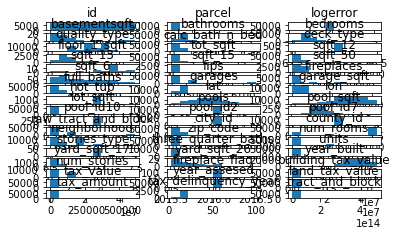

In [148]:
df.hist(grid=False, layout=(21,3))
# plt.tight_layout()
plt.show()


<a id="FUNCTION"></a>
<div class="alert alert-block alert-info">
</div>

___
### 3. **Write a function that takes in a dataframe of observations and attributes and returns 
- a dataframe where each row is an atttribute name, 
- the first column is the number of rows with missing values for that attribute, 
- the second column is percent of total rows that have missing values for that attribute. 

- Run the function and document takeaways from this on how you want to handle missing values.**

#### The output should look like the table below:

| |num_rows_missing	|pct_rows_missing|
|---|---|---|
|parcelid	|0	|0.000000|
|airconditioningtypeid|	29041|	0.535486|
|architecturalstyletypeid	|54232	|0.999982|

<a id="BOTTOM"></a>
<div class="alert alert-block alert-info">
</div>

___

# FINAL CELL
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>